<a href="https://colab.research.google.com/github/anchalvishawakarma/Projects/blob/main/Health_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Model 

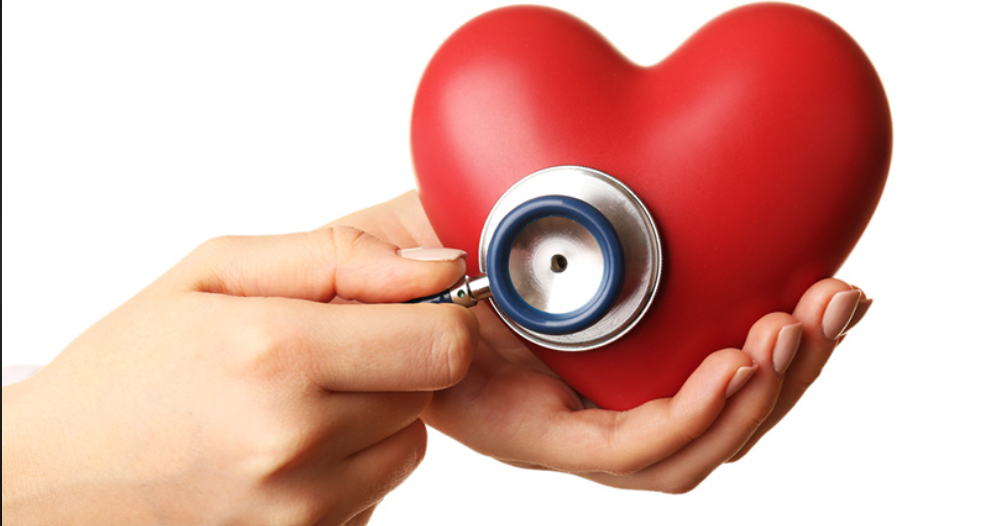

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Visualization Libraries
import matplotlib.pyplot as plt #--> vender is matlab
import seaborn as sns

# Import Filter Warning Librares
import warnings
warnings.filterwarnings('ignore')

# Customise Descriptive Stats
from collections import OrderedDict

# Import Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, accuracy_score, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score,RandomizedSearchCV


In [2]:
url= 'https://raw.githubusercontent.com/chandanc5525/MachineLearning-Bootcamp/refs/heads/main/heart-disease.csv'
df = pd.read_csv(url)
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:

stats =[]
for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature': i,
      'Mean':df[i] .mean(),
      'Median':df[i].median(),
      'Std':df[i].std(),
      'Max':df[i].max(),
      'Min': df[i].min(),
      '25%':df[i].quantile(0.25),
      '75%':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
      'Skew':df[i].skew(),
      'Kurtosis':df[i].kurtosis()
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Feature,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.39934,0.729373,2.313531,0.544554
Median,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
Std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.52586,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
Max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
Min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,47.5,0.0,0.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,0.0,2.0,0.0
75%,61.0,1.0,2.0,140.0,274.5,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0
IQR,13.5,1.0,2.0,20.0,63.5,0.0,1.0,32.5,1.0,1.6,1.0,1.0,1.0,1.0
Skew,-0.202463,-0.791335,0.484732,0.713768,1.143401,1.986652,0.162522,-0.53741,0.742532,1.26972,-0.508316,1.310422,-0.476722,-0.179821


In [6]:
df['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7
46     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
38     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [7]:
df['sex'].value_counts()#.plot(kind='barh')

sex
1    207
0     96
Name: count, dtype: int64

In [8]:
'''cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
'''
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [9]:
#  trestbps: resting blood pressure (in mm Hg on admission to the hospital)
df['trestbps'].value_counts()


trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
124     6
135     6
145     5
152     5
134     5
170     4
100     4
122     4
105     3
180     3
136     3
142     3
126     3
115     3
148     2
146     2
144     2
178     2
94      2
102     2
104     1
155     1
172     1
101     1
129     1
156     1
117     1
106     1
200     1
165     1
174     1
192     1
123     1
154     1
114     1
164     1
Name: count, dtype: int64

In [10]:
# chol: serum cholestoral in mg/dl
df['chol'].value_counts()

chol
204    6
234    6
197    6
212    5
269    5
      ..
169    1
187    1
176    1
241    1
131    1
Name: count, Length: 152, dtype: int64

In [11]:
#  fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [12]:
"""restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"""

df['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [13]:
# thalach: maximum heart rate achieved

df['thalach'].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

In [14]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [ ]:
df['oldpeak'].value_counts()

oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
1.9     5
1.5     5
3.0     5
0.5     5
2.2     4
3.6     4
0.9     3
3.4     3
4.0     3
2.4     3
0.3     3
3.2     2
2.3     2
1.1     2
4.2     2
2.5     2
1.3     1
3.5     1
0.7     1
3.1     1
6.2     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: count, dtype: int64

In [16]:
df['slope'].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [17]:
df['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [18]:
df['thal'].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [ ]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [20]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1


# **Data Insights**

### **1. Most Affected Age Groups**  
- The **late 50s** have the highest prevalence of heart disease, with **58 years** (19 cases) being the most common, followed by **57 years** (17 cases) and **54 years** (16 cases). This suggests that individuals in their late 50s are at higher risk.

---

### **2. Distribution by Sex**  
- **Male (Sex 1)**: **207 cases**, indicating a significantly higher prevalence of heart disease among men.  
- **Female (Sex 0)**: **96 cases**, showing a lower prevalence compared to men.

---

### **3. Most Common Chest Pain Types (cp)**  
- **Asymptomatic (Value 0)**: Most frequent, with **143 cases**, making it challenging for diagnosis due to the lack of symptoms.  
- **Atypical Angina (Value 2)**: Second most common with **87 cases** (about 30%).  
- **Typical Angina (Value 1)**: Moderate frequency, with **50 cases** (17%).  
- **Non-Anginal Pain (Value 3)**: Least common, with **23 cases**.

---

### **4. Resting Blood Pressure (trestbps)**  
- **Common Range**: Most cases fall within **120–140 mmHg**, with **120 mmHg** (37 cases) being the most frequent.  
- **High BP**: Values above **150 mmHg** are less frequent, with the highest being **200 mmHg** (1 case).  
- **Low BP**: Rare values below **110 mmHg**, e.g., **94 mmHg** (2 cases).  
- **Key Focus**: **120–140 mmHg** is the critical range for monitoring heart disease risk.

---

### **5. Cholesterol Levels (chol)**  
- **Common Range**: Most cases fall between **200–270**, with **204**, **197**, and **234** being the most frequent (**6 cases each**).  
- **Rare Values**: Extremely low (**131**) and high (**284**) levels are uncommon, with only **1 case** each.  
- **Key Focus**: Cholesterol levels in the **200–270** range are crucial for monitoring heart disease risk.

---

### **6. Fasting Blood Sugar (fbs)**  
- **Low FBS (Value 0)**: Dominates the dataset with **258 cases**, indicating that most individuals do not have elevated fasting blood sugar levels (>120 mg/dL).  
- **High FBS (Value 1)**: Present in **45 cases**, suggesting that elevated fasting blood sugar is less common among heart disease patients.

---

### **7. Resting ECG (restecg)**  
- **ST-T Wave Abnormality (Value 1)**: Most common, with **152 cases**.  
- **Normal (Value 0)**: Second most frequent, with **147 cases**.  
- **Left Ventricular Hypertrophy (Value 2)**: Rare, with only **4 cases**.

---

### **8. Maximum Heart Rate Achieved (thalach)**  
- **Common Range**: Most cases fall between **150–170 bpm**, with **162 bpm** being the most frequent (**11 cases**).  
- **Rare Values**: Extremes like **90 bpm** and values above **184 bpm** are uncommon, with **1 case** each.

---

### **9. Exercise-Induced Angina (exang)**  
- **No Angina (Value 0)**: Dominates with **204 cases**, indicating the majority do not experience exercise-induced angina.  
- **Angina Present (Value 1)**: Found in **99 cases**, representing about **one-third** of the dataset.

---

### **10. Oldpeak (ST Depression Induced by Exercise)**  
- **Most Frequent Value**: **0.0** (99 cases), indicating no ST depression in many patients.  
- **Common Range**: Values between **0.0–2.0** dominate, with **1.2** (17 cases) being the most frequent among them.  
- **Rare Extremes**: Values above **3.0** are uncommon.

---

### **11. Slope of the Peak Exercise ST Segment (slope)**  
- **Up-sloping (Value 2)**: Most common, with **142 cases**.  
- **Flat (Value 1)**: Close second, with **140 cases**.  
- **Down-sloping (Value 0)**: Least common, with **21 cases**.

---

### **12. Number of Major Vessels (ca)**  
- **No Vessels (Value 0)**: Most common, with **175 cases**, indicating no major vessel involvement in many patients.  
- **1–2 Vessels**: **65 cases** (1 vessel) and **38 cases** (2 vessels), representing significant subsets.  
- **3–4 Vessels**: Rare, with **20 cases** (3 vessels) and **5 cases** (4 vessels).

---

### **13. Thalassemia (thal)**  
- **Fixed Defect (Value 2)**: Most common, with **166 cases**.  
- **Normal (Value 3)**: Second most frequent, with **117 cases**.  
- **Reversible Defect (Value 1)**: Rare, with **18 cases**.  
- **Unknown/Other (Value 0)**: Extremely rare, with only **2 cases**.

---


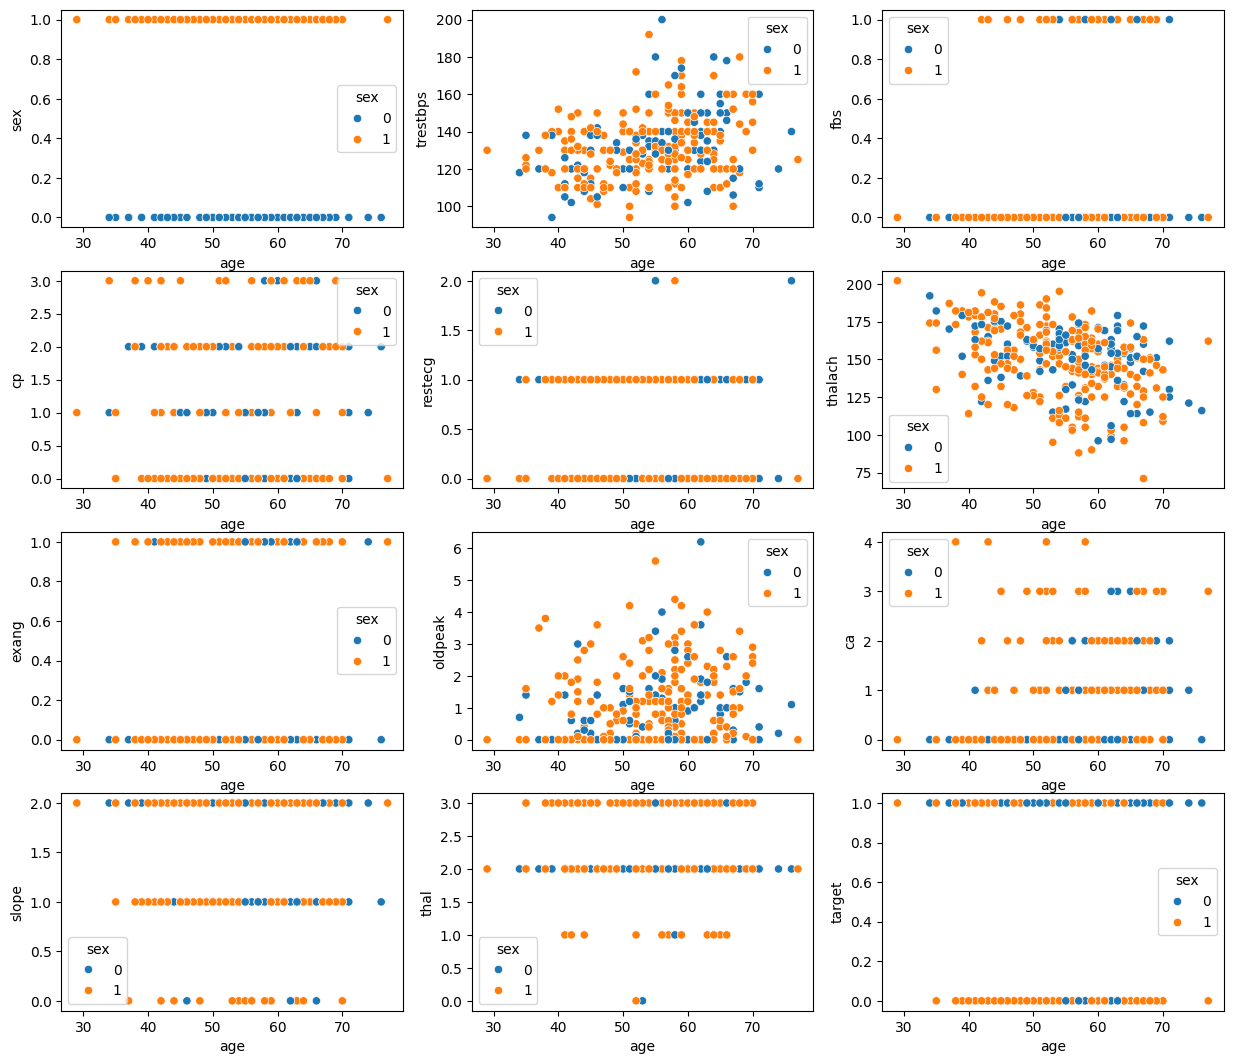

In [21]:
fig,ax = plt.subplots(4,3,figsize = (15,13),facecolor = 'white')
sns.scatterplot(ax = ax [0][0],x = df.age, y = df.sex, hue = df.sex)
sns.scatterplot(ax = ax [0][1],x = df.age, y = df.trestbps, hue = df.sex)
sns.scatterplot(ax = ax [0][2],x = df.age, y = df.fbs, hue = df.sex)
sns.scatterplot(ax = ax [1][0],x = df.age, y = df.cp, hue = df.sex)
sns.scatterplot(ax = ax [1][1],x = df.age, y = df.restecg, hue = df.sex)
sns.scatterplot(ax = ax [1][2],x = df.age, y = df.thalach, hue = df.sex)
sns.scatterplot(ax = ax [2][0],x = df.age, y = df.exang, hue = df.sex)
sns.scatterplot(ax = ax [2][1],x = df.age, y = df.oldpeak, hue = df.sex)
sns.scatterplot(ax = ax [2][2],x = df.age, y = df.ca, hue = df.sex)
sns.scatterplot(ax = ax [3][0],x = df.age, y = df.slope, hue = df.sex)
sns.scatterplot(ax = ax [3][1],x = df.age, y = df.thal, hue = df.sex)
sns.scatterplot(ax = ax [3][2],x = df.age, y = df.target, hue = df.sex)
plt.show()

In [22]:

feature = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
for col in feature:
    print(f'Feature : {col}')
    print(feature[col].value_counts())
    print('------------------')

Feature : age
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7
46     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
38     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
------------------
Feature : sex
sex
1    207
0     96
Name: count, dtype: int64
------------------
Feature : cp
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
------------------
Feature : trestbps
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
124     6
135     6
145     5
152     5
134     5
170     4
100     4
122     4
105     3
180     3
136     3
142     3
126     3
115     3
148     2
146     2
144     2
178     2
94      2
102     2
104     1
155     1
172     1
10

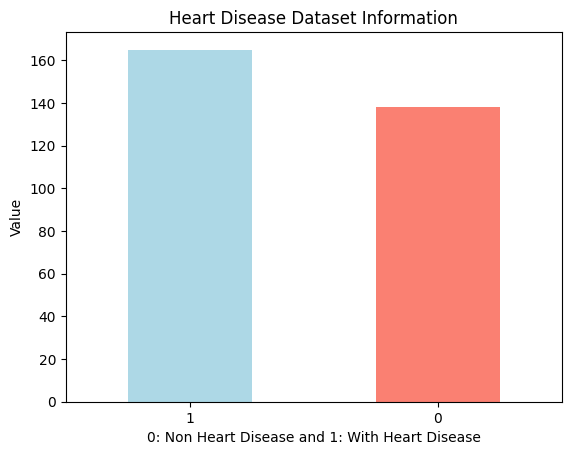

In [23]:
df.target.value_counts().plot(kind = 'bar',color = ['lightblue','salmon'])
plt.title('Heart Disease Dataset Information')
plt.xlabel('0: Non Heart Disease and 1: With Heart Disease')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

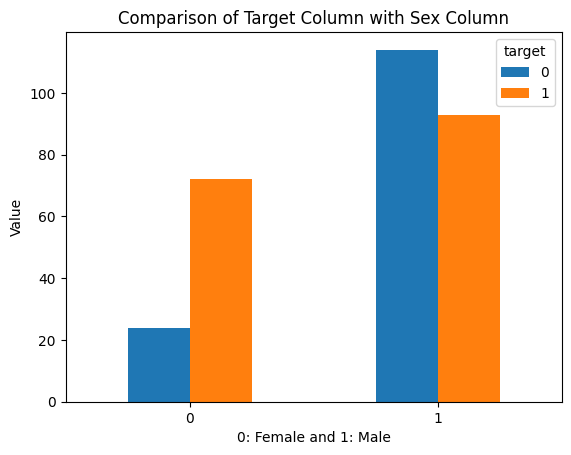

In [24]:
# Comparison of Target Column with Sex Column
pd.crosstab(df.sex,df.target).plot(kind = 'bar')
plt.title('Comparison of Target Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

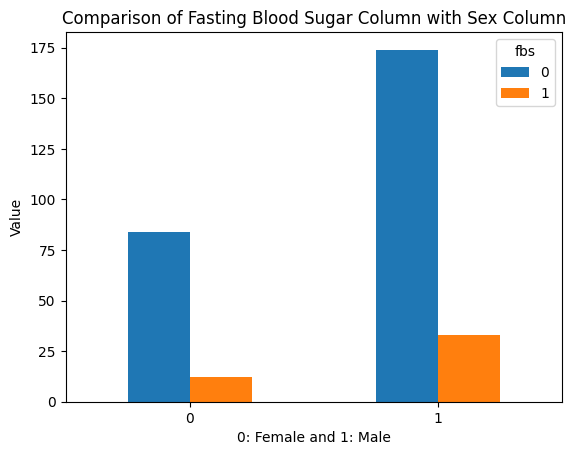

In [25]:
# Comparison of Fasting Blood Sugar Column with Sex Column
pd.crosstab(df.sex,df.fbs).plot(kind = 'bar')
plt.title('Comparison of Fasting Blood Sugar Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()


# **Summary of Key Insights**

1. **Age**: Late 50s, especially age **58**, is the most affected group.  
2. **Gender**: Males (**207 cases**) are significantly more affected than females (**96 cases**).  
3. **Chest Pain**: **Asymptomatic chest pain** is the most prevalent, making diagnosis challenging.  
4. **Resting Blood Pressure**: Majority fall in the **120–140 mmHg** range, a critical monitoring range.  
5. **Cholesterol**: Levels **200–270** are most common, with outliers being rare.  
6. **Exercise-Induced Angina**: Most patients (**204 cases**) do not experience angina during exercise.  
7. **Oldpeak (ST Depression)**: **0.0–2.0** is the common range, with **0.0** being the most frequent.  
8. **Major Vessels (ca)**: Most patients have **no blocked vessels (175 cases)**.  
9. **Thalassemia**: **Fixed defect** is the most common type (**166 cases**).  


In [26]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


[]

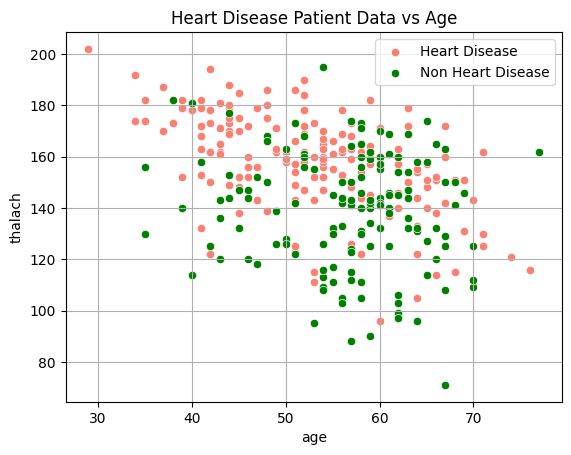

In [27]:
# Data Visualization for Heart Disease Patient Data vs Age
sns.scatterplot(x = df.age[df.target==1], y = df.thalach[df.target==1],color='salmon')
sns.scatterplot(x = df.age[df.target==0], y = df.thalach[df.target==0],color='green')
plt.title('Heart Disease Patient Data vs Age')
plt.legend(['Heart Disease','Non Heart Disease'])
plt.grid()
plt.plot()

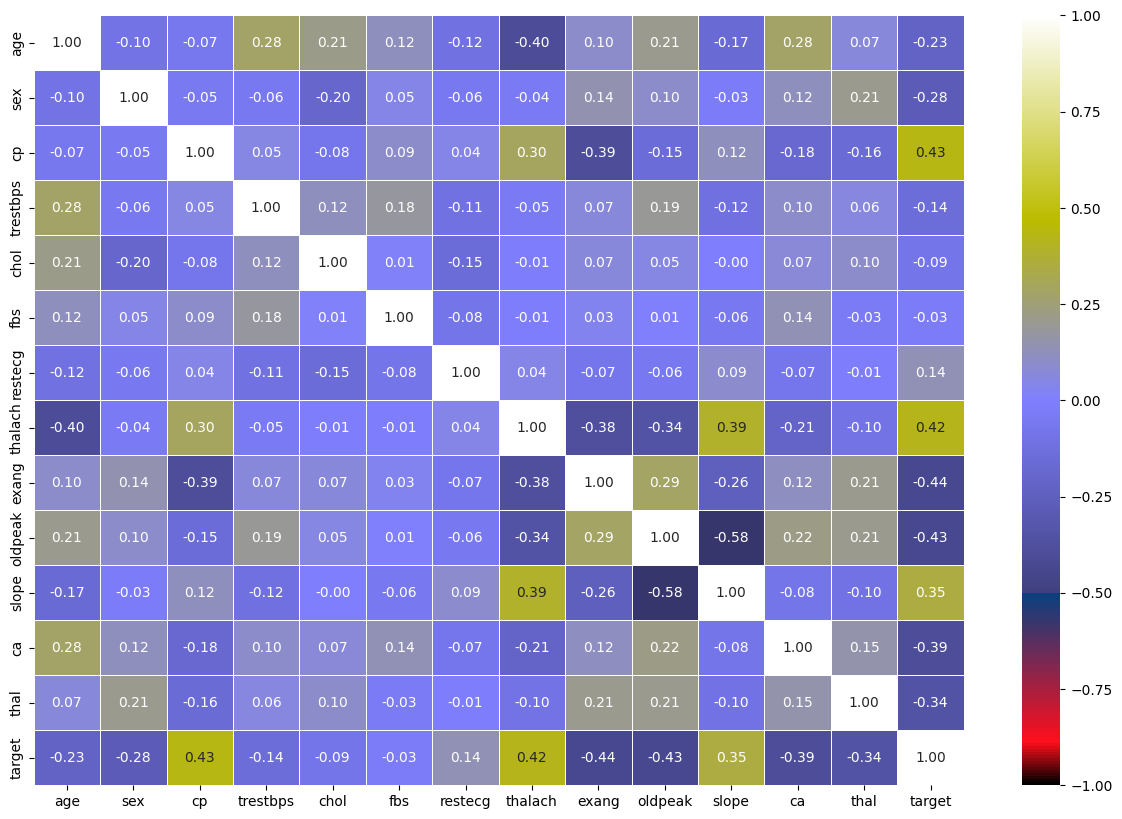

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='gist_stern',center=0,vmax=1,vmin=-1,linewidths=0.5,fmt='0.2f')
plt.show()

## Data Split into X and y

In [29]:
X = df.drop('target',axis=1)
y = df['target']

In [30]:
# Model Evaluation

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)


In [31]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'KNNClassifier':KNeighborsClassifier()}

def evaluate(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Creating One Dictionary to Save Model Score
    model_score = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [32]:
model_score = evaluate(models = models ,X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test)
model_score

{'LogisticRegression': 0.8351648351648352,
 'RandomForestClassifier': 0.7912087912087912,
 'KNNClassifier': 0.6813186813186813}

In [33]:
# Model Comparison

model_comparison = pd.DataFrame(model_score,index = ['Accuracy'])
model_comparison.sort_values(by = 'Accuracy',axis = 1,ascending= False)



,LogisticRegression,RandomForestClassifier,KNNClassifier
Accuracy,0.835165,0.791209,0.681319


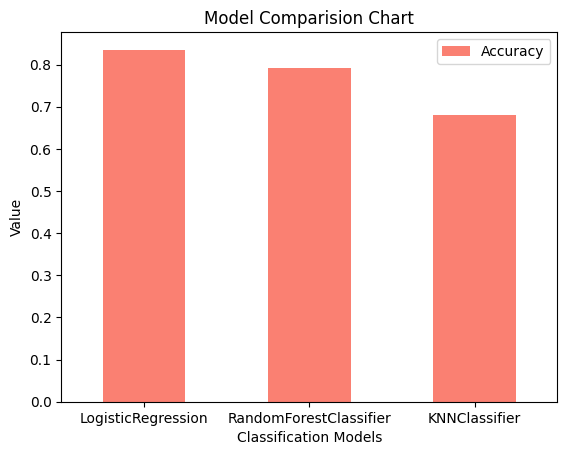

In [34]:
# Model Comparison Graphical Representation

model_comparison.T.plot(kind = 'bar',color = 'salmon')
plt.title('Model Comparision Chart')
plt.xlabel('Classification Models')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()


### Hyper Parameter Tuning
#### Hyper Parameter Tuning Manually

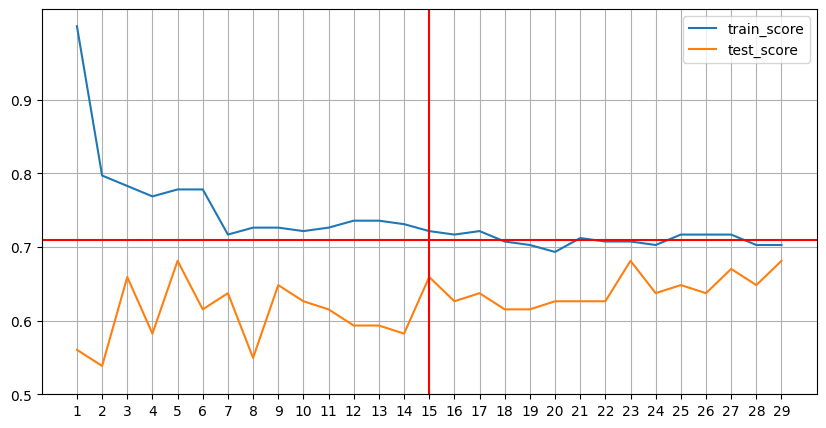

In [35]:
# Tunning KNN Model

train_score = []
test_score = []

# Create a list of different values of n_neighbours
neighbors = range(1,30)

# Setting KNN
Knn = KNeighborsClassifier()

# Loop Calcualtions
for i in neighbors:
    Knn.set_params(n_neighbors = i)
    Knn.fit(X_train,y_train)
    
    train_score.append(Knn.score(X_train,y_train))
    test_score.append(Knn.score(X_test,y_test))
plt.subplots(figsize = (10,5))    
plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)
plt.xticks(np.arange(1,30,1))
plt.yticks(np.arange(0.5,1,0.1))
plt.axhline(0.71,c = 'r')
plt.axvline(15,c = 'r')
plt.legend(['train_score','test_score'])
plt.grid()
plt.show()

### Hyper Parameter Tuning with RandomizedSearchCV

In [36]:
rf = RandomForestClassifier()
rf.get_params()   # Checking Various Parameters for RandomForestClassifier


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
rf_grid = { 'n_estimators': np.arange(10,1000,50),
            'max_depth': [None,3,5,10],
            'min_samples_leaf': np.arange(2,20,2),
            'min_samples_split': np.arange(1,20,2)
           }

np.random.seed(42)

randomforest = RandomizedSearchCV(RandomForestClassifier(),param_distributions = rf_grid,cv =5, n_iter = 20,verbose= True)
randomforest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
randomforest.best_params_   # Best Parameter for RandomForestClassifier Model 


{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(7),
 'min_samples_leaf': np.int64(6),
 'max_depth': None}

In [39]:

randomforest.score(X_test,y_test)
print(f'The Model Score using RandomForestClassifier is {randomforest.score(X_test,y_test)*100:.2f} %')



The Model Score using RandomForestClassifier is 81.32 %


In [40]:

y_pred = randomforest.predict(X_test)


## Confusion Matrix
# Building Confusion Matrix


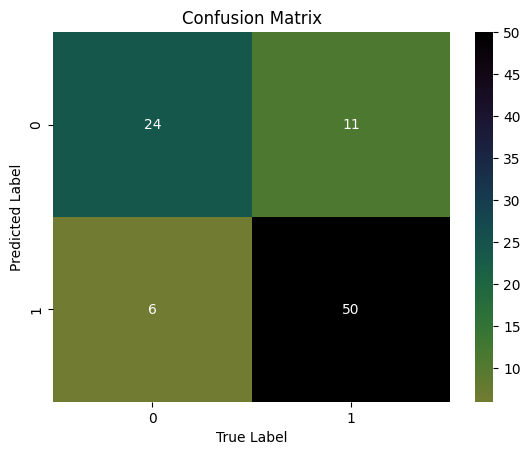

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='cubehelix_r',center=0)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


# Classification Report

In [42]:


print(classification_report(y_test,y_pred))
cv_acc = cross_val_score(randomforest,X,y,cv = 5,scoring = 'accuracy')
print(f'CV Accuracy Score : {np.mean(cv_acc)*100:.2f} %')



              precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.82      0.89      0.85        56

    accuracy                           0.81        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.81      0.81        91

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CV Accuracy Score : 82.49 %


In [43]:
cv_prec = cross_val_score(randomforest,X,y,cv = 5,scoring = 'precision')
print(f'CV Precision Score : {np.mean(cv_prec)*100:.2f} %')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CV Precision Score : 84.09 %


In [44]:

cv_recall = cross_val_score(randomforest,X,y,cv = 5,scoring = 'recall')
print(f'CV Recall Score : {np.mean(cv_recall)*100:.2f} %')



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CV Recall Score : 87.88 %


In [45]:
cv_f1 = cross_val_score(randomforest,X,y,cv = 5,scoring = 'f1')

print(f'CV F1 Score : {np.mean(cv_f1)*100:.2f} %')



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CV F1 Score : 85.52 %


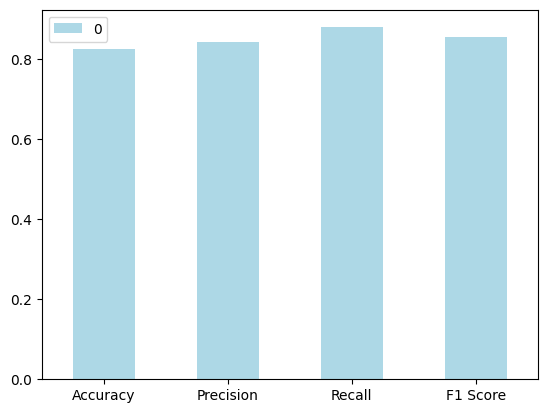

In [46]:
CrossvalidationData = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                                    'Precision':np.mean(cv_prec),
                                    'Recall':np.mean(cv_recall),
                                    'F1 Score':np.mean(cv_f1)
                                     },index = [0])
CrossvalidationData.T.plot(kind='bar',color = 'lightblue')
plt.xticks(rotation=0)
plt.show()
